In [27]:
import numpy as np 
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-pastel")

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

# Initial Data Analysis of Wine Quality Data Set

In [28]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

df = pd.DataFrame(wine_quality.data.original)

df.describe().round(3) 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


<AxesSubplot:>

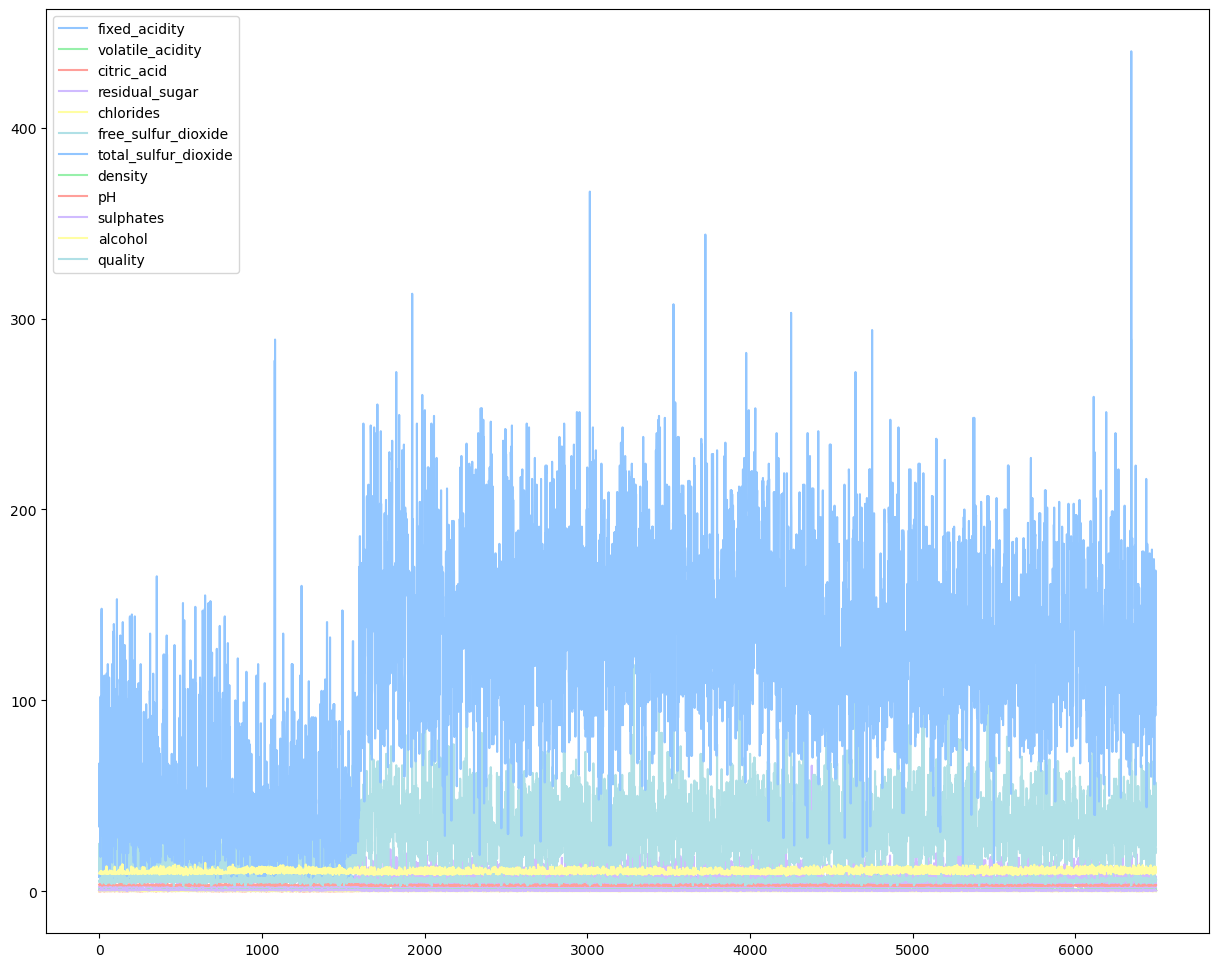

In [29]:
df.plot(figsize=(15,12))

In [30]:
avg_quality = df.groupby("quality").mean()
avg_quality

#trying to see average of features for each level of wine quality
#can't see much correlation between any of these features and wine quality yet
#seems to be trends with volatile acidity, free sulfure dioxide, and alcohol

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


<AxesSubplot:xlabel='quality'>

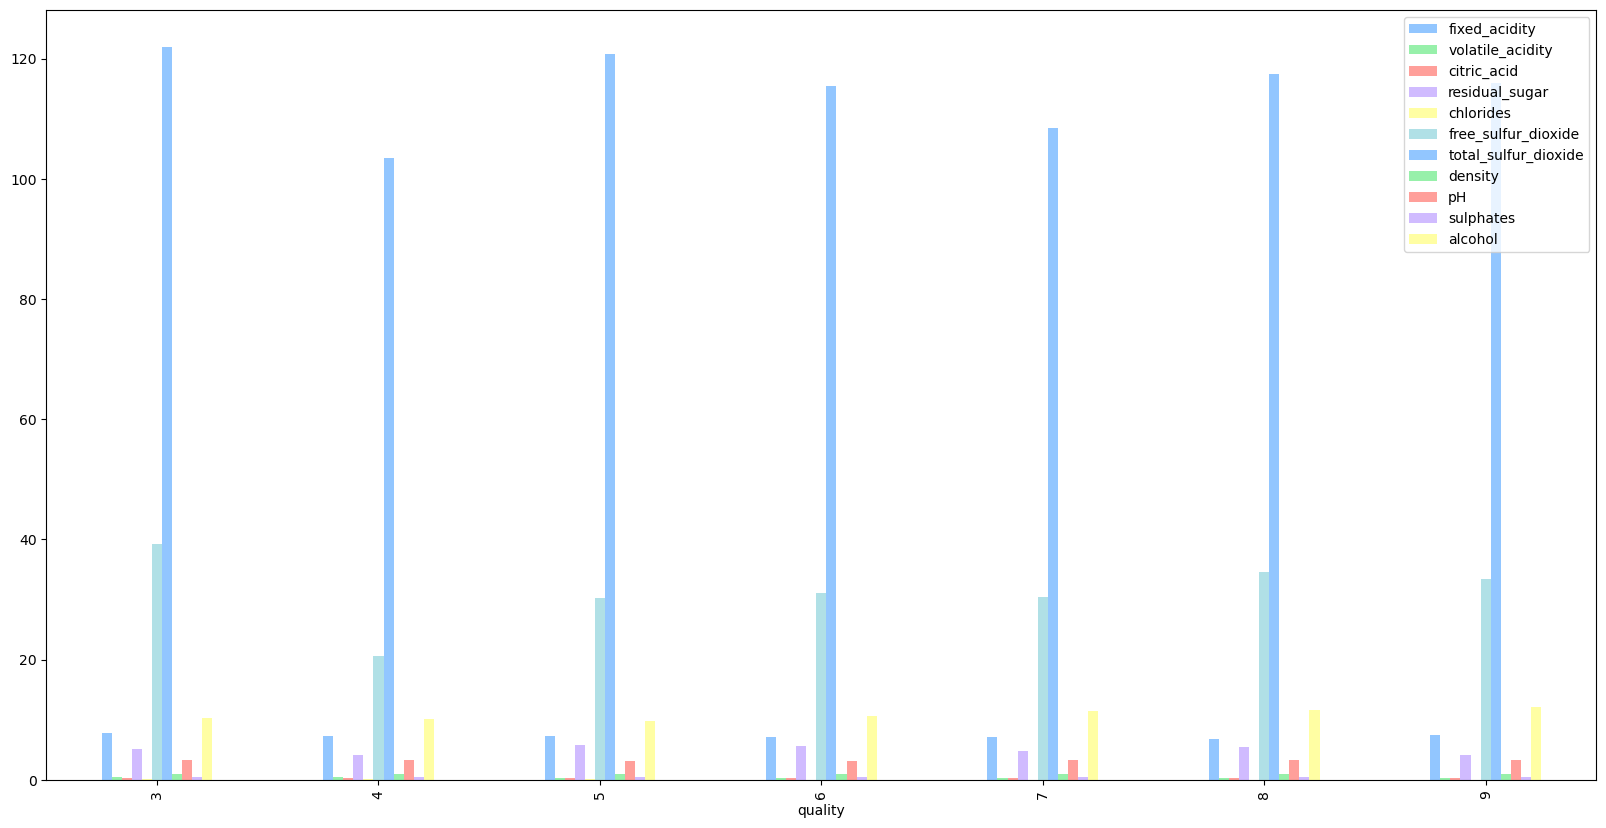

In [31]:
avg_quality.plot(kind="bar",figsize=(20,10))
#visualizing averages

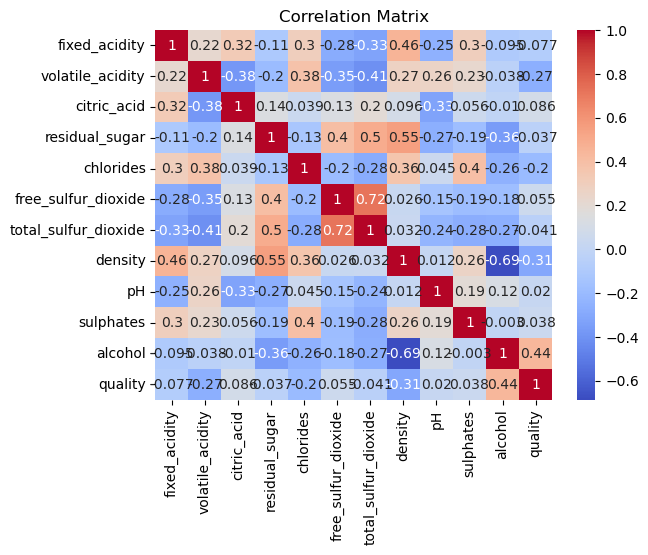

                 Feature  Importance
10               alcohol    0.251382
1       volatile_acidity    0.127309
5    free_sulfur_dioxide    0.090306
9              sulphates    0.078655
6   total_sulfur_dioxide    0.076025
3         residual_sugar    0.071031
8                     pH    0.066815
4              chlorides    0.064518
7                density    0.060458
2            citric_acid    0.058180
0          fixed_acidity    0.055320


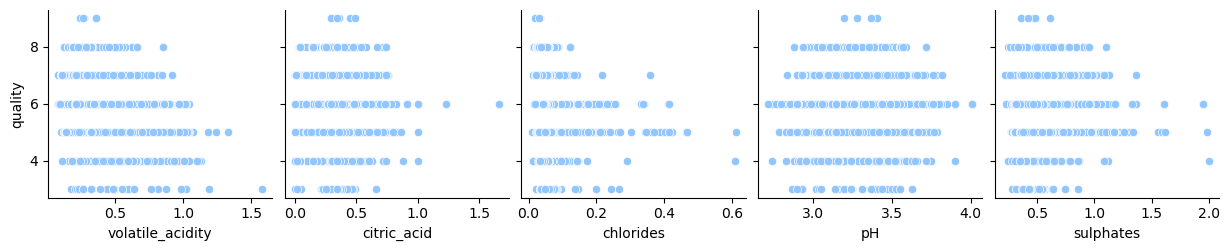

In [32]:
# correlation analysis
df1 = df.drop('color', axis=1)
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# feature importance
X = df1.drop('quality',axis=1)
y = df['quality']
model = RandomForestRegressor()
model.fit(X, y)
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)
print(sorted_features)

# visualization
sns.pairplot(df1, x_vars=['volatile_acidity', 'citric_acid', 'chlorides', 'pH', 'sulphates'], y_vars=['quality'], kind='scatter')
plt.show()

As we can see from this analysis, we should focus on alcohol, volatile acidity, and free sulfure dioixed when prediciting wine quality.

In [33]:
# define a function to calculate the slope of the regression line

def calculate_slope(x, y):
    """
    Calculate the slope of the regression line using the least squares method.

    Parameters:
    x: Array containing the x-values (independent variable).
    y: Array containing the y-values (dependent variable).

    Returns:
    slope (float): Slope of the regression line.
    """
    n = len(x)  # number of data points
    dot_sum = np.dot(x, y)  # dot product of x and y
    sumX = np.sum(x)  # sum of x-values
    sumY = np.sum(y)  # sum of y-values
    sumX2 = np.sum(x ** 2)  # sum of squared x-values

    # calculate the slope of the regression line
    slope = (n * dot_sum - sumX * sumY) / (n * sumX2 - sumX ** 2)
    
    return slope

In [34]:
# define a function to calculate the intercept of the linear regression line

def calculate_intercept(x, y):
    """
    Calculate the intercept of the linear regression line using the least squares method.

    Parameters:
    x: Array containing the x-values (independent variable).
    y: Array containing the y-values (dependent variable).

    Returns:
    intercept (float): Intercept of the linear regression line.
    """
    slope = calculate_slope(x, y)  # calculate the slope using the previously defined function
    intercept = np.mean(y) - slope * np.mean(x)  # calculate the intercept

    return intercept

In [35]:
# define a function to make predictions using the linear regression algorithm

def make_prediction(slope, x_input, intercept):
    """
    Make predictions using the linear regression algorithm.

    Parameters:
    slope (float): Slope of the regression line.
    x_input: Array containing the input x-values.
    intercept (float): Intercept of the regression line.

    Returns:
    predictions (array-like): Predicted y-values corresponding to the input x-values.
    """
    predictions = slope * x_input + intercept  # calculate predictions using the linear regression equation

    return predictions

In [36]:
#define a function to find R-squared

def calculate_r_squared(predicted_values, test_values):
    """
    Calculate R-squared, a regression metric.

    Parameters:
    predicted_values (array-like): Array containing the predicted y-values.
    test_values (array-like): Array containing the actual y-values.

    Returns:
    r_squared (float): R-squared value indicating the goodness of fit of the regression model.
    """
    y_mean = np.mean(test_values)  # mean of actual y-values

    # calculate the sum of squares
    sum_sq_total = np.sum((test_values - y_mean) ** 2)

    # calculate the sum of residuals
    sum_sq_residuals = np.sum((test_values - predicted_values) ** 2)

    # calculate R-squared
    r_squared = 1 - (sum_sq_residuals / sum_sq_total)

    return r_squared

In [37]:
#define a function to find the correlation coefficient

def calculate_correlation_coefficient(predicted_values, test_values):
    """
    Calculate the correlation coefficient between predicted and actual values.

    Parameters:
    predicted_values: Array containing the predicted y-values.
    test_values: Array containing the actual y-values.

    Returns:
    correlation_coefficient (float): The correlation coefficient between predicted and actual values.
    """
    # Calculate necessary sums and statistics
    dot_product = np.sum(predicted_values * test_values)
    sum_predicted = np.sum(predicted_values)
    sum_actual = np.sum(test_values)
    sum_predicted_squared = np.sum(predicted_values ** 2)
    sum_actual_squared = np.sum(test_values ** 2)
    n = len(predicted_values)

    # Calculate correlation coefficient
    numerator = n * dot_product - sum_predicted * sum_actual
    denominator = np.sqrt((n * sum_predicted_squared - sum_predicted ** 2) * (n * sum_actual_squared - sum_actual ** 2))
    correlation_coefficient = numerator / denominator

    return correlation_coefficient

In [38]:
#define a function to find the covariance

def calculate_covariance(X, Y):
    """
    Calculate the covariance between two arrays X and Y.

    Parameters:
    X: Array containing the X-values.
    Y: Array containing the Y-values.

    Returns:
    covariance (float): The covariance between X and Y.
    """
    # calculate necessary sums and statistics
    dot_product = np.sum(X * Y)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    n = len(X)

    # calculate covariance
    covariance = dot_product / n - mean_X * mean_Y

    return covariance

In [39]:
#define a function which takes the dataset and ouputs a processed dataset

def preprocessor(df):
    """
    Preprocess the dataset by applying label encoding to specific columns.

    Parameters:
    df (DataFrame): Input DataFrame containing the dataset.

    Returns:
    res_df (DataFrame): Processed DataFrame with label encoding applied to specific columns.
    """
    # create a copy of the input DataFrame to avoid modifying the original DataFrame
    res_df = df.copy()

    # initialize the LabelEncoder
    le = preprocessing.LabelEncoder()

    # apply label encoding to selected columns
    columns_to_encode = ['sulphates', 'total_sulfur_dioxide', 'residual_sugar', 
                         'pH', 'chlorides', 'density', 'citric_acid', 'fixed_acidity']
    for column in columns_to_encode:
        res_df[column] = le.fit_transform(res_df[column])

    return res_df

R-squared: 0.2247962639738308
Correlation Coefficient: 0.4771526730509023


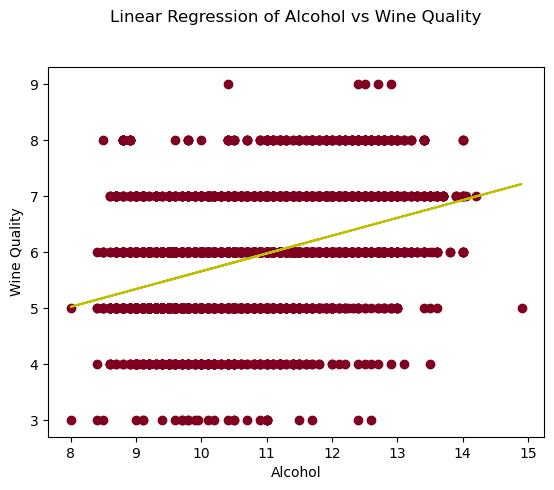

In [50]:
#preprocess data
encoded_df = preprocessor(df)

X = encoded_df.alcohol
X_va = encoded_df.volatile_acidity
y = encoded_df.quality
X_s = encoded_df.sulphates

#divide the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

#find intercept of the training regression line
intercept = Intercept(X_train,y_train)
slope = Slope(X_train,y_train)

predictions = Prediction(slope = slope,x_input = X_test, intercept = intercept)

print("R-squared:", R_squared(predicted_values = predictions, test_values = y_test))
print("Correlation Coefficient:", Correlation_coeff(test_values = y_test, predicted_values = predictions))

#get the euation of the regression line
y_est = slope * X + intercept

#plot the linear regression function
plt.scatter(X,y, color = '#800020')
plt.plot(X,y_est, color = 'y')
plt.title('Linear Regression of Alcohol vs Wine Quality', y=1.1)
plt.ylabel('Wine Quality')
plt.xlabel('Alcohol')
plt.show()

The R-squared value of 0.216 indicates that the regression model explains about 21.6% of the variance in the dependent variable. This value suggests that the model might not fully capture the variability in the data, indicating that it might not be a perfect fit for predicting wine quality.

The correlation coefficient of 0.466 suggests a moderate positive correlation between the predictor and response variables. While this indicates a relationship between the variables, it's not particularly strong.

In summary, the regression model has limited explanatory power, as evidenced by the relatively low R-squared value, and there exists a moderate positive linear relationship between the predictor and response variables, as indicated by the correlation coefficient.

R-squared: 0.06995600838614646
Correlation Coefficient: 0.26454108755619044


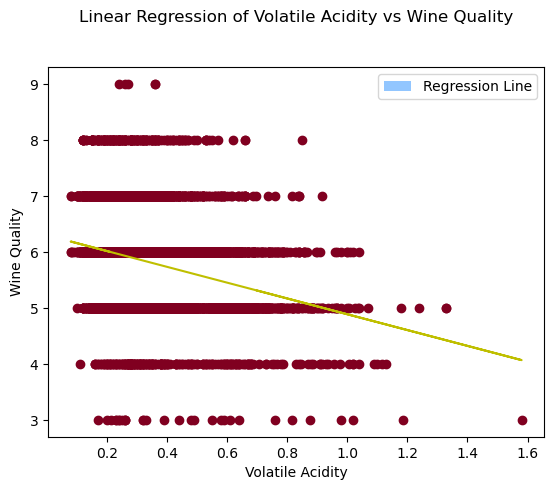

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_va, y)
#Find the intercept of the training regression line using the functions created previously
intercept = Intercept(X_train,y_train)
slope = Slope(X_train,y_train)

predictions = Prediction(slope = slope,x_input = X_test, intercept = intercept)

print("R-squared:", R_squared(predicted_values = predictions, test_values = y_test))
print("Correlation Coefficient:", Correlation_coeff(test_values = y_test, predicted_values = predictions))
#Equation of the regression line
y_est = slope * X_va + intercept
#Plot the linear regression function
plt.scatter(X_va,y, color = '#800020')
plt.plot(X_va,y_est, color = 'y')
blue_patch = mpatches.Patch(label='Regression Line')
plt.legend(loc=0,handles=[blue_patch])
plt.title('Linear Regression of Volatile Acidity vs Wine Quality', y=1.1)
plt.ylabel('Wine Quality')
plt.xlabel('Volatile Acidity')
plt.show()

R-squared: -0.0012721365780894445
Correlation Coefficient: 0.01703279326136473


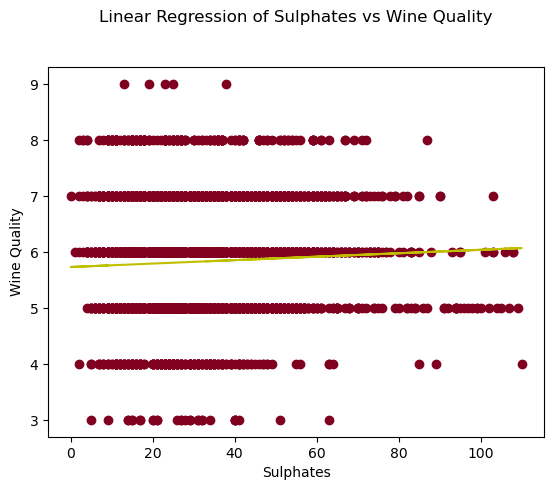

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y)

#find the intercept of the training regression line using the functions created previously
intercept = Intercept(X_train,y_train)
slope = Slope(X_train,y_train)

predictions = Prediction(slope = slope,x_input = X_test, intercept = intercept)

print("R-squared:", R_squared(predicted_values = predictions, test_values = y_test))
print("Correlation Coefficient:", Correlation_coeff(test_values = y_test, predicted_values = predictions))
#equation of the regression line
y_est = slope * X_s + intercept
#plot the linear regression function
plt.scatter(X_s,y, color = '#800020')
plt.plot(X_s,y_est, color = 'y')
plt.title('Linear Regression of Sulphates vs Wine Quality', y=1.1)
plt.ylabel('Wine Quality')
plt.xlabel('Sulphates')
plt.show()